## Детектор углов Харриса

In [1]:
import numpy as np
import cv2 as cv

filename = 'crossword.jpg'

img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

Функция принимает 4 аргумента:
- изображение
- размер блока (участка изображения в пикселях)
- значение апертуры (1,3,5 или 7 - применяется для расчетов второй производной для фильтра), контроль фильтра
- свободное число для дополнительного контроля фильтра

In [2]:
dst = cv.cornerHarris(gray,2,3,0.04)

In [3]:
# Процесс дилатации - поможет добавить значимости некоторым "слабым" детекциям
dst = cv.dilate(dst,None)

# Выставление порога для предотвращения дублирования функций Харриса.
img[dst>0.005*dst.max()]=[0,0,255]
cv.imshow('dst',img)

cv.waitKey(0)
cv.destroyAllWindows()

## Суб-пиксельная точность

In [4]:
filename = 'crossword.jpg'

img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

dst = cv.dilate(dst,None)

ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# Найти центроиды - центр значений для каждого найденного угла
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# С этой функцией мы уже сталкивались - задаем критерий для остановки алгоритма
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Отображаем получившийся результат
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel.png',img)

True

## Оператор Собеля

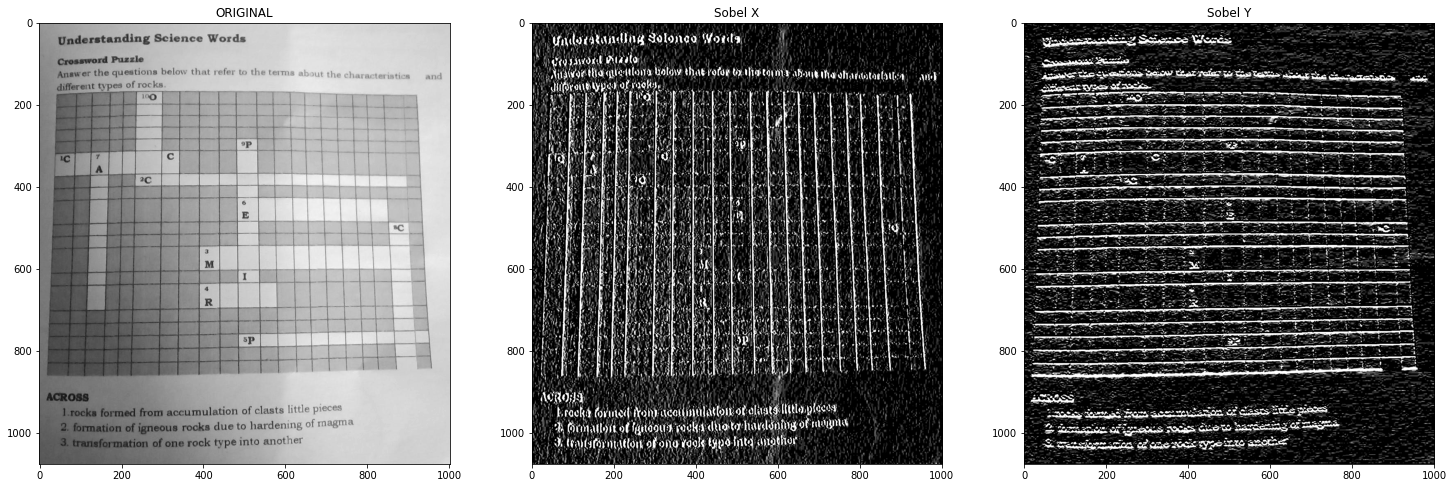

In [5]:
from matplotlib import pyplot as plt

img = cv.imread('crossword.jpg',0)

sobelx = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_8U,0,1,ksize=5)

fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(231)
ax1.imshow(img,cmap = 'gray')
ax1.set_title('ORIGINAL')
plt.subplot(232),plt.imshow(sobelx, cmap = 'gray'),plt.title('Sobel X')
plt.subplot(233),plt.imshow(sobely, cmap = 'gray'),plt.title('Sobel Y')
plt.show()

Как вы могли заметить, результат оказался немного неточным и "шумным". Дело в том, что значения, с которыми работает оператор Собеля, могут сильно повлиять на итоговый результат. При использовании CV_8U, мы убираем отрицательные значения (unsigned integer), которые могут появляться в результате перемножения на маску Собеля. Чтобы этого не допустить, попробуем использовать CV_64F (64-битное число с плавающей точкой), хотя, будет достаточно и 16 бит.

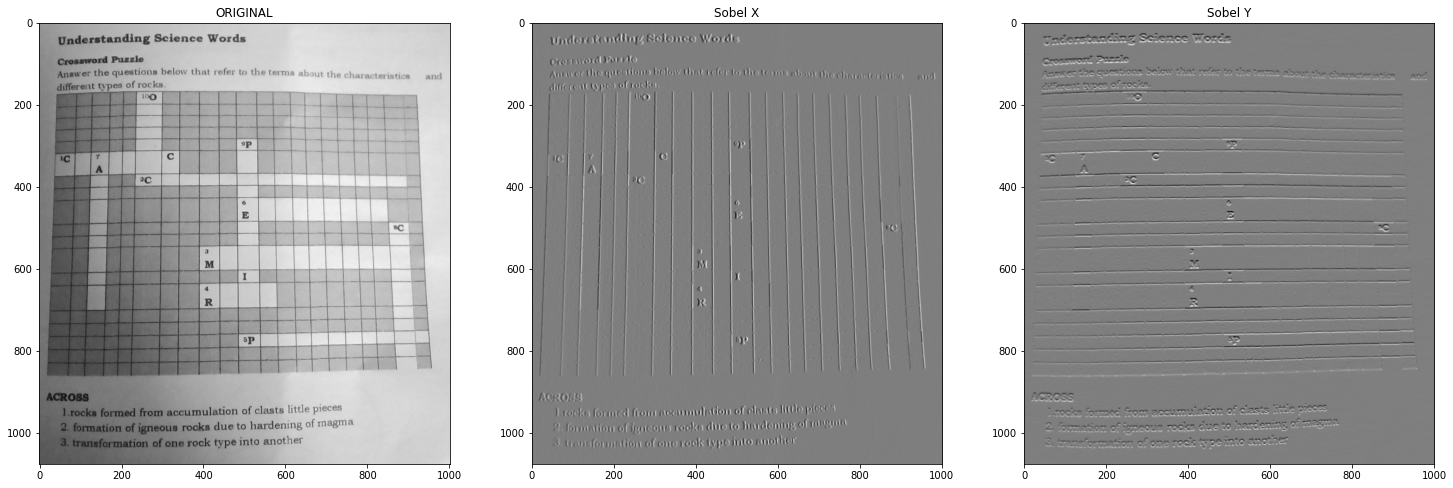

In [6]:
img = cv.imread('crossword.jpg',0)

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(231)
ax1.imshow(img,cmap = 'gray')
ax1.set_title('ORIGINAL')
plt.subplot(232),plt.imshow(sobelx, cmap = 'gray'),plt.title('Sobel X')
plt.subplot(233),plt.imshow(sobely, cmap = 'gray'),plt.title('Sobel Y')
plt.show()